In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Read data

In [3]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [4]:
df.head(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,0,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,1,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,0,29.5,20.5,25.016667,79.0,41.0,23,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,0,28.0,19.9,23.925000,78.0,44.0,43,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,0,30.4,19.7,24.229167,74.0,30.0,49,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,0,30.5,19.6,24.579167,68.0,28.0,39,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,0,32.6,20.6,25.887500,73.0,33.0,19,NaN,NaN,51.0,NaN,82.0


In [5]:
df.tail(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1816,2019-12-22,Sun,6,51,12,1,0,0,32.9,20.3,26.037500,84.0,34.0,34,0.0,14.0,NaN,7.0,NaN
1817,2019-12-23,Mon,0,52,12,0,0,0,25.9,19.0,22.291667,91.0,59.0,47,NaN,14.0,NaN,7.0,NaN
1818,2019-12-24,Tue,1,52,12,0,0,0,24.6,17.6,21.175000,91.0,65.0,37,NaN,13.0,NaN,6.0,NaN
1819,2019-12-25,Wed,2,52,12,0,1,0,30.3,17.4,23.525000,91.0,36.0,59,NaN,8.0,NaN,6.0,NaN
1820,2019-12-26,Thu,3,52,12,0,0,1,30.4,20.8,25.000000,79.0,37.0,71,NaN,9.0,NaN,5.0,NaN
1821,2019-12-27,Fri,4,52,12,0,0,0,29.1,19.9,24.016667,83.0,40.0,48,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,0,28.6,19.7,23.245833,88.0,44.0,39,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,0,29.4,18.8,22.333333,90.0,40.0,36,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,0,29.3,18.1,22.958333,84.0,32.0,41,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,0,29.9,18.8,24.045833,79.0,37.0,49,NaN,8.0,NaN,5.0,NaN


In [6]:
df.count()

Date                 1826
DayOfWeek            1826
DayOfWeekNum         1826
WeekOfYear           1826
Month                1826
IsWeekend            1826
IsHoliday            1826
IsDayAfterHoliday    1826
temp_max             1826
temp_min             1826
temp_mean            1826
humidity_max         1826
humidity_min         1826
NUMBER_INT           1826
CO                   1581
MP10                 1457
O3                   1265
MP2.5                1195
SO2                  1091
dtype: int64

### Set features

In [7]:
selected_cols_final = [
    'Date',
    'DayOfWeekNum',
    'WeekOfYear',
    'Month',
    'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    'SO2',
    'temp_max',
    'temp_min',
    'humidity_max',
]

df_final = df[selected_cols_final].copy()

In [8]:
# add lag

df_final['SO2_lag1'] = df_final['SO2'].shift(1)
df_final['SO2_lag2'] = df_final['SO2'].shift(2)
df_final['SO2_lag3'] = df_final['SO2'].shift(3)

df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
# df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [9]:
df_final = df_final.dropna()

In [10]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 3 to 1620
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1031 non-null   object 
 1   DayOfWeekNum   1031 non-null   int64  
 2   WeekOfYear     1031 non-null   int64  
 3   Month          1031 non-null   int64  
 4   IsWeekend      1031 non-null   int64  
 5   IsHoliday      1031 non-null   int64  
 6   NUMBER_INT     1031 non-null   int64  
 7   SO2            1031 non-null   float64
 8   temp_max       1031 non-null   float64
 9   temp_min       1031 non-null   float64
 10  humidity_max   1031 non-null   float64
 11  SO2_lag1       1031 non-null   float64
 12  SO2_lag2       1031 non-null   float64
 13  SO2_lag3       1031 non-null   float64
 14  temp_min_lag1  1031 non-null   float64
 15  temp_min_lag2  1031 non-null   float64
 16  temp_min_lag3  1031 non-null   float64
dtypes: float64(10), int64(6), object(1)
memory usage: 145.0+ 

,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag1,SO2_lag2,SO2_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
count,1031,1031.000000,1031.000000,1031.000000,1031.00000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
unique,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.977692,26.685742,6.548012,0.28516,0.030068,46.827352,18.508244,28.431814,18.095053,82.999030,18.447139,18.382153,18.343356,18.102716,18.115713,18.133075
std,NaN,2.012699,16.031770,3.672434,0.45171,0.170857,15.882129,16.759454,2.899169,2.570725,8.895455,16.767770,16.735447,16.713649,2.571040,2.566204,2.550603
min,NaN,0.000000,1.000000,1.000000,0.00000,0.000000,11.000000,0.000000,17.800000,7.700000,51.000000,0.000000,0.000000,0.000000,7.700000,7.700000,7.700000
25%,NaN,1.000000,13.000000,3.000000,0.00000,0.000000,35.000000,8.000000,26.700000,16.600000,77.000000,8.000000,8.000000,8.000000,16.600000,16.600000,16.600000
50%,NaN,3.000000,25.000000,6.000000,0.00000,0.000000,45.000000,12.000000,28.700000,18.700000,85.000000,12.000000,12.000000,12.000000,18.700000,18.700000,18.700000
75%,NaN,5.000000,42.000000,10.000000,1.00000,0.000000,58.000000,24.000000,30.500000,19.800000,91.000000,24.000000,24.000000,24.000000,19.900000,19.900000,19.900000


In [11]:
df_final.dtypes

Date              object
DayOfWeekNum       int64
WeekOfYear         int64
Month              int64
IsWeekend          int64
IsHoliday          int64
NUMBER_INT         int64
SO2              float64
temp_max         float64
temp_min         float64
humidity_max     float64
SO2_lag1         float64
SO2_lag2         float64
SO2_lag3         float64
temp_min_lag1    float64
temp_min_lag2    float64
temp_min_lag3    float64
dtype: object

## Train

In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
# df_final = df_final.sort_values(by='Date')

# remove the last 5 days (account for lag ...)
# df_final = df_final[:-5]

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)



df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag1,SO2_lag2,SO2_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
3,6,1,1,1,0,20,82.0,30.6,22.2,81.0,83.0,83.0,82.0,20.2,21.0,20.6
4,0,2,1,0,0,51,82.0,30.8,20.8,79.0,82.0,83.0,83.0,22.2,20.2,21.0
5,1,2,1,0,0,23,82.0,29.5,20.5,79.0,82.0,82.0,83.0,20.8,22.2,20.2
6,2,2,1,0,0,43,82.0,28.0,19.9,78.0,82.0,82.0,82.0,20.5,20.8,22.2
7,3,2,1,0,0,49,82.0,30.4,19.7,74.0,82.0,82.0,82.0,19.9,20.5,20.8


In [14]:
df_train.tail()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag1,SO2_lag2,SO2_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1456,3,52,12,0,0,60,14.0,24.8,18.8,92.0,14.0,14.0,14.0,18.6,18.5,18.5
1457,4,52,12,0,0,61,14.0,25.4,18.5,92.0,14.0,14.0,14.0,18.8,18.6,18.5
1458,5,52,12,1,0,30,14.0,27.5,17.7,92.0,14.0,14.0,14.0,18.5,18.8,18.6
1459,6,52,12,1,0,26,12.0,27.3,18.5,93.0,14.0,14.0,14.0,17.7,18.5,18.8
1460,0,1,12,0,0,61,14.0,25.9,19.2,92.0,12.0,14.0,14.0,18.5,17.7,18.5


In [15]:
df_val.head(10)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag1,SO2_lag2,SO2_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1461,1,1,1,0,1,44,16.0,27.9,19.2,92.0,14.0,12.0,14.0,19.2,18.5,17.7
1462,2,1,1,0,0,45,16.0,31.1,18.9,90.0,16.0,14.0,12.0,19.2,19.2,18.5
1463,3,1,1,0,0,28,16.0,30.7,20.4,88.0,16.0,16.0,14.0,18.9,19.2,19.2
1464,4,1,1,0,0,37,16.0,25.4,19.0,91.0,16.0,16.0,16.0,20.4,18.9,19.2
1465,5,1,1,1,0,36,22.0,30.1,18.6,91.0,16.0,16.0,16.0,19.0,20.4,18.9
1466,6,1,1,1,0,30,20.0,31.8,18.8,90.0,22.0,16.0,16.0,18.6,19.0,20.4
1467,0,2,1,0,0,37,20.0,31.2,20.9,79.0,20.0,22.0,16.0,18.8,18.6,19.0
1468,1,2,1,0,0,39,20.0,29.6,19.7,87.0,20.0,20.0,22.0,20.9,18.8,18.6
1469,2,2,1,0,0,49,20.0,29.4,19.0,78.0,20.0,20.0,20.0,19.7,20.9,18.8
1470,3,2,1,0,0,51,20.0,29.2,19.7,75.0,20.0,20.0,20.0,19.0,19.7,20.9


In [16]:
df_val.tail(20)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,SO2,temp_max,temp_min,humidity_max,SO2_lag1,SO2_lag2,SO2_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1601,1,21,5,0,0,74,12.0,28.4,13.7,91.0,10.0,10.0,10.0,15.6,15.5,17.2
1602,2,21,5,0,0,90,14.0,28.9,14.1,89.0,12.0,10.0,10.0,13.7,15.6,15.5
1603,3,21,5,0,0,71,10.0,28.8,15.4,88.0,14.0,12.0,10.0,14.1,13.7,15.6
1604,4,21,5,0,0,67,10.0,28.8,15.7,90.0,10.0,14.0,12.0,15.4,14.1,13.7
1605,5,21,5,1,0,62,12.0,27.3,16.3,91.0,10.0,10.0,14.0,15.7,15.4,14.1
1606,6,21,5,1,0,45,10.0,28.0,13.9,86.0,12.0,10.0,10.0,16.3,15.7,15.4
1607,0,22,5,0,0,72,10.0,28.5,16.8,83.0,10.0,12.0,10.0,13.9,16.3,15.7
1608,1,22,5,0,0,74,10.0,28.7,16.5,90.0,10.0,10.0,12.0,16.8,13.9,16.3
1609,2,22,5,0,0,74,10.0,29.0,16.3,91.0,10.0,10.0,10.0,16.5,16.8,13.9
1610,3,22,5,0,0,75,10.0,28.1,17.0,88.0,10.0,10.0,10.0,16.3,16.5,16.8


## Test (10x with cv)

In [17]:
results = []
results30 = []

param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
}

In [18]:
for i in range(10):
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nRun {i+1} Best Hyperparameters:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.4f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics 1y
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    # Metrics 30d
    y_pred_30d = best_xgb_model.predict(X_val[:30])
    y_val_30 = y_val[:30]
    mse_30d = mean_squared_error(y_val_30, y_pred_30d)
    rmse_30d = np.sqrt(mse_30d)
    mae_30d = mean_absolute_error(y_val_30, y_pred_30d)
    mape_val_30d = mape(y_val_30, y_pred_30d)
    smape_val_30d = smape(y_val_30, y_pred_30d)
    r2_30d = r2_score(y_val_30, y_pred_30d)
    corr_30d = np.corrcoef(y_val_30, y_pred_30d)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })

    results30.append({
        'run': i+1,
        'random_state': i,
        'MSE_30d': mse_30d,
        'RMSE_30d': rmse_30d,
        'MAE_30d': mae_30d,
        'MAPE_30d': mape_val_30d,
        'sMAPE_30d': smape_val_30d,
        'R2_30d': r2_30d,
        'Correlation_30d': corr_30d
    })




Run 1 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 12, 'min_samples_split': 16, 'n_estimators': 60}
Best R-squared: 0.5171

Run 2 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 16, 'min_samples_split': 16, 'n_estimators': 160}
Best R-squared: 0.5105

Run 3 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 12, 'min_samples_split': 14, 'n_estimators': 160}
Best R-squared: 0.5084

Run 4 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 14, 'min_samples_split': 16, 'n_estimators': 160}
Best R-squared: 0.5056

Run 5 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 12, 'n_estimators': 20}
Best R-squared: 0.5152

Run 6 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 20}
Best R-squared: 0.5235

Run 7 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 16, 'min_samples_split': 14, 'n_estimators': 80}
Best R-squared: 0.5088

Run 8 Best Hyperparameters:
Best Hyperp

### Results 1y

In [19]:
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,105.411544,10.267012,7.921437,15.118739,16.188454,0.603957,0.839936,"{'max_depth': 12, 'min_samples_split': 16, 'n_...",0.517062
1,2,1,103.698118,10.183227,7.866634,15.066707,16.099658,0.610395,0.839451,"{'max_depth': 16, 'min_samples_split': 16, 'n_...",0.510535
2,3,2,103.567958,10.176834,7.866275,15.145206,16.205106,0.610884,0.840181,"{'max_depth': 12, 'min_samples_split': 14, 'n_...",0.508370
3,4,3,107.837847,10.384500,8.092424,15.482288,16.716681,0.594841,0.841835,"{'max_depth': 14, 'min_samples_split': 16, 'n_...",0.505625
4,5,4,108.944007,10.437625,8.106365,15.510822,16.697323,0.590685,0.833493,"{'max_depth': 10, 'min_samples_split': 12, 'n_...",0.515234
5,6,5,103.706613,10.183644,7.822333,14.958314,16.138973,0.610363,0.843028,"{'max_depth': 8, 'min_samples_split': 8, 'n_es...",0.523526
6,7,6,105.094692,10.251570,7.909526,15.227253,16.291217,0.605148,0.838742,"{'max_depth': 16, 'min_samples_split': 14, 'n_...",0.508756
7,8,7,106.768501,10.332884,7.975148,15.273666,16.404982,0.598859,0.839261,"{'max_depth': 12, 'min_samples_split': 16, 'n_...",0.510439
8,9,8,103.639807,10.180364,7.861347,15.063482,16.082645,0.610614,0.839461,"{'max_depth': 20, 'min_samples_split': 16, 'n_...",0.506044
9,10,9,101.270972,10.063348,7.807682,15.128061,16.112731,0.619514,0.839326,"{'max_depth': None, 'min_samples_split': 12, '...",0.511759


In [20]:
results_df.describe()

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Cross-validated R-squared
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,104.994006,10.246101,7.922917,15.197454,16.293777,0.605526,0.839471,0.511735
std,3.02765,3.02765,2.311527,0.112648,0.104806,0.180123,0.238520,0.008685,0.002479,0.005504
min,1.00000,0.00000,101.270972,10.063348,7.807682,14.958314,16.082645,0.590685,0.833493,0.505625
25%,3.25000,2.25000,103.654385,10.181080,7.862579,15.079715,16.119291,0.600134,0.839277,0.508466
50%,5.50000,4.50000,104.400653,10.217607,7.888080,15.136633,16.196780,0.607755,0.839456,0.510487
75%,7.75000,6.75000,106.429261,10.316416,7.961720,15.262063,16.376541,0.610559,0.840120,0.514365
max,10.00000,9.00000,108.944007,10.437625,8.106365,15.510822,16.716681,0.619514,0.843028,0.523526


### results 30d

In [21]:
results_df_30 = pd.DataFrame(results30)
results_df_30

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
0,1,0,50.481334,7.105022,6.013778,15.565652,16.601728,0.246060,0.707145
1,2,1,49.476837,7.033977,5.920655,15.799352,16.545057,0.261062,0.692956
2,3,2,50.360376,7.096504,6.024341,16.164070,17.100959,0.247866,0.704441
3,4,3,53.333749,7.302996,6.199540,16.411221,17.571063,0.203459,0.705026
4,5,4,55.132998,7.425160,6.323686,16.913478,17.984459,0.176587,0.684871
5,6,5,58.738900,7.664131,6.314013,16.436568,17.724988,0.122733,0.665905
6,7,6,52.551367,7.249232,6.084792,16.229067,17.205048,0.215144,0.692256
7,8,7,52.117670,7.219257,6.055426,15.960537,17.067915,0.221621,0.703439
8,9,8,48.471964,6.962181,5.860976,15.616733,16.380074,0.276070,0.700325
9,10,9,52.690291,7.258808,6.162742,16.558934,17.498350,0.213069,0.693304


In [22]:
results_df_30.describe()

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,52.335549,7.231727,6.095995,16.165561,17.167964,0.218367,0.694967
std,3.02765,3.02765,2.990427,0.204603,0.154271,0.433230,0.536849,0.044662,0.012474
min,1.00000,0.00000,48.471964,6.962181,5.860976,15.565652,16.380074,0.122733,0.665905
25%,3.25000,2.25000,50.390615,7.098634,6.016419,15.839648,16.718275,0.205861,0.692431
50%,5.50000,4.50000,52.334519,7.234245,6.070109,16.196568,17.153004,0.218382,0.696814
75%,7.75000,6.75000,53.172885,7.291949,6.190340,16.430231,17.552885,0.247415,0.704190
max,10.00000,9.00000,58.738900,7.664131,6.323686,16.913478,17.984459,0.276070,0.707145


## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = RandomForestRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 10 with RMSE = 10.06
Best parameters: {'max_depth': None, 'min_samples_split': 12, 'n_estimators': 120}


### 1y

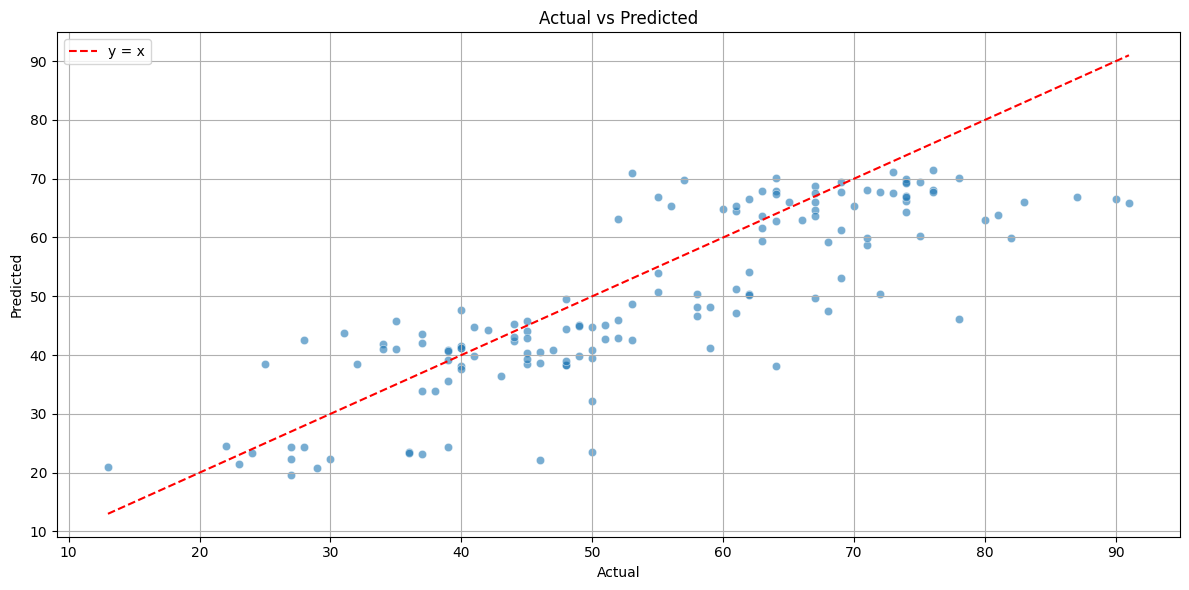

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:], y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

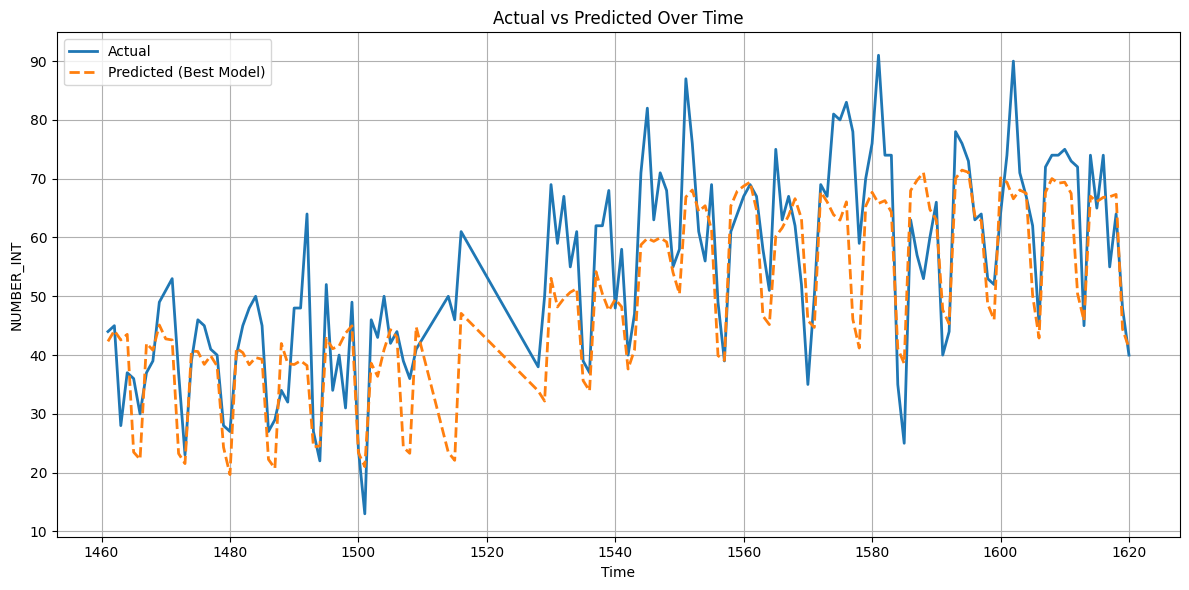

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 30d

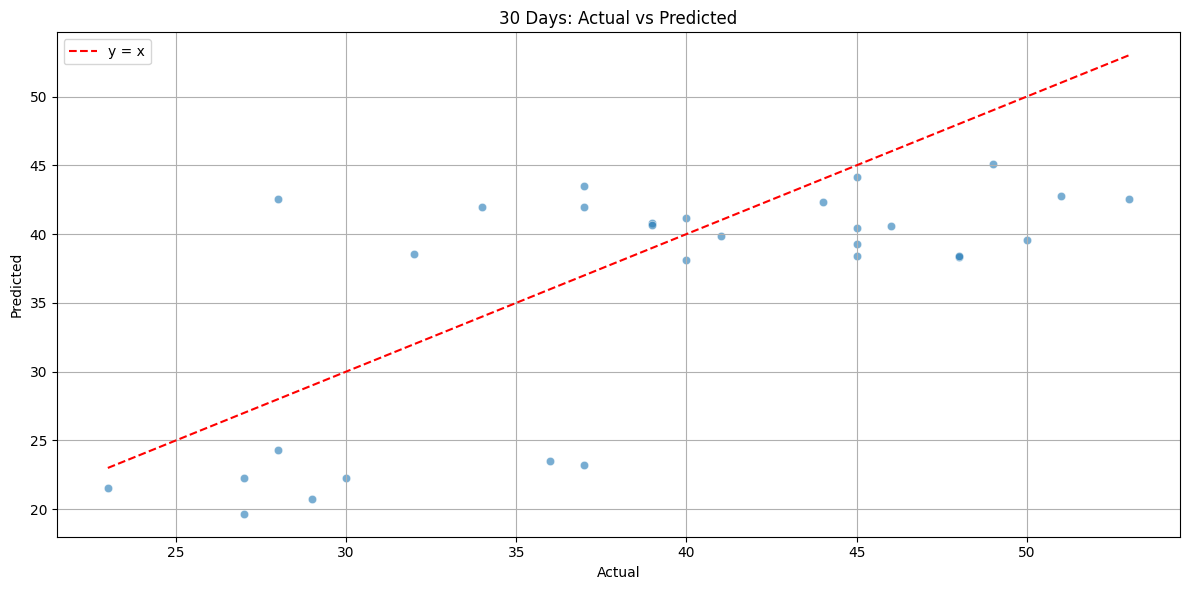

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:30], y=y_pred_best[:30], alpha=0.6)
plt.plot([y_val[:30].min(), y_val[:30].max()], [y_val[:30].min(), y_val[:30].max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('30 Days: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


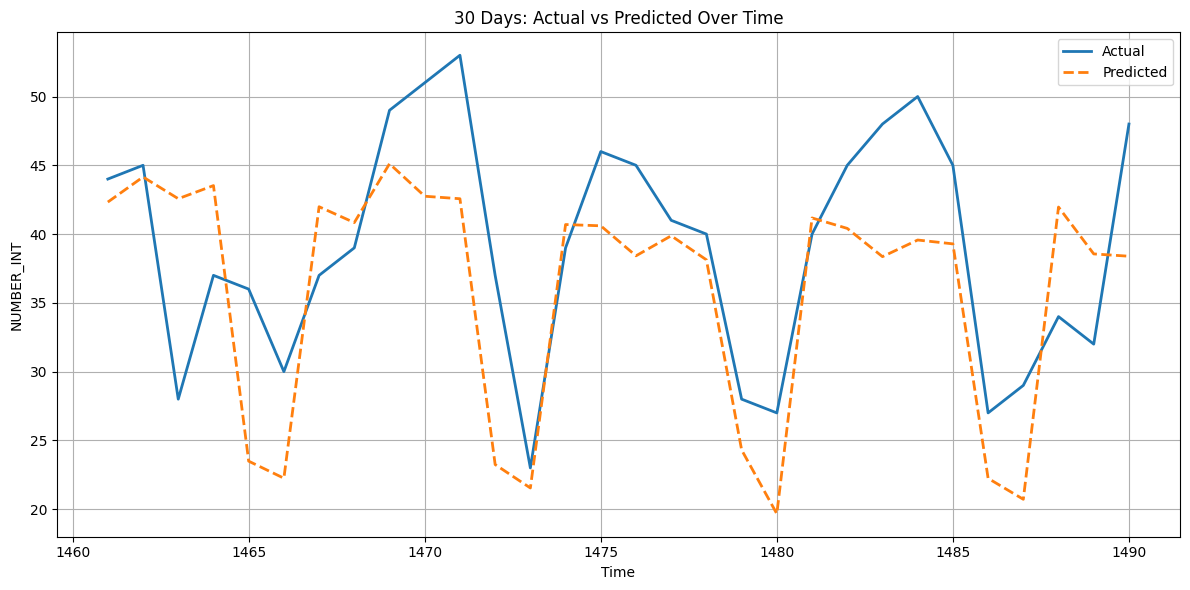

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index[:30], y_val[:30].values, label='Actual', linewidth=2)
plt.plot(y_val.index[:30], y_pred_best[:30], label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title('30 Days: Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

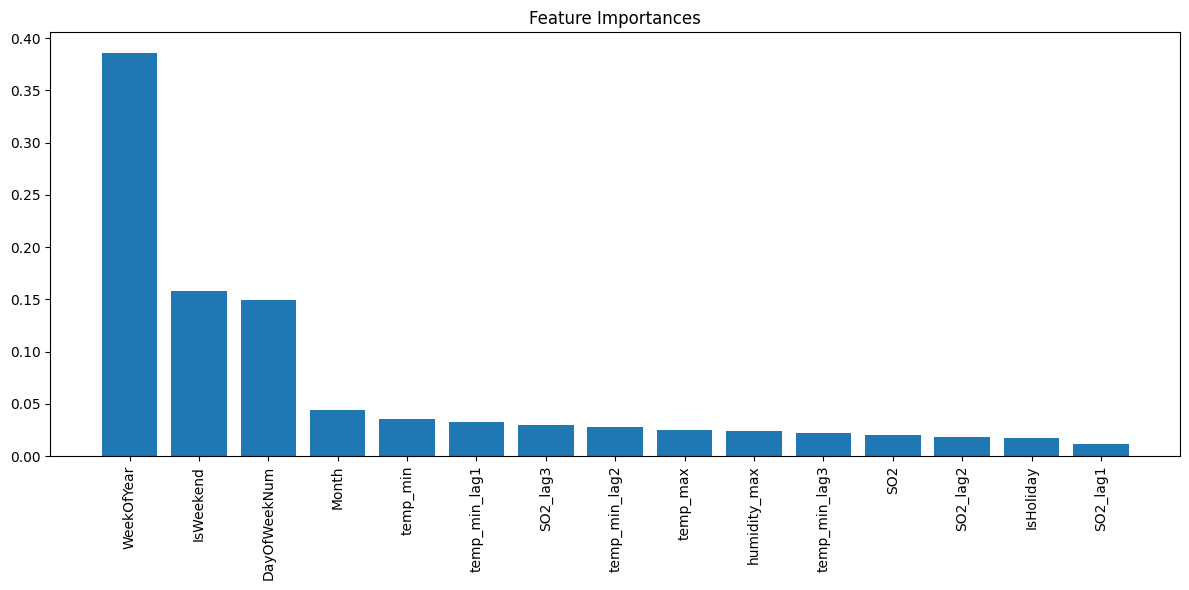

In [28]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()